# CS677 Deep Learning – Homework 4

#### Rahaf Alhazmi

## Predict Microsoft's stock prices and volumes in the following 2 weeks (11/08/2021 to 11/19/2021) by using RNN model 

### 1) Preparing the dataset and loading the required libraries 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if IS_COLAB:
    !pip install -q -U tensorflow-addons
    !pip install -q -U transformers

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "nlp"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
#import the required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
import math
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

#to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
#load the dataset
df = pd.read_csv("MSFT-1.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/7/2016,59.779999,60.520000,59.779999,60.419998,55.902321,31664800
1,11/8/2016,60.549999,60.779999,60.150002,60.470001,55.948589,22935400
2,11/9/2016,60.000000,60.590000,59.200001,60.169998,55.671009,49632500
3,11/10/2016,60.480000,60.490002,57.630001,58.700001,54.310928,57822400
4,11/11/2016,58.230000,59.119999,58.009998,59.020000,54.607002,38767800


In [4]:
#prepare our dataset by removing the adj close because we do not need it
df = df.drop(['Adj Close'], axis=1)
df.tail()

,Date,Open,High,Low,Close,Volume
1254,11/1/2021,331.359985,331.489990,326.369995,329.369995,27073200
1255,11/2/2021,330.309998,333.450012,330.000000,333.130005,26487100
1256,11/3/2021,333.899994,334.899994,330.649994,334.000000,21500100
1257,11/4/2021,332.890015,336.540009,329.510010,336.440002,23992200
1258,11/5/2021,338.510010,338.790009,334.420013,336.059998,22564000


### 2) Build a RNN model to predict the close prices 

In [5]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (1259, 6)


In [6]:
training_set = df.iloc[:600, 4:5].values
test_set = df.iloc[600:1200, 4:5].values

In [7]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 600):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
len(X_train)

540

In [9]:
#building RNN model to predict the close prices 
model = Sequential()
model.add(LSTM(units = 110, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 110, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 110, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 110, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 110))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Metal device set to: Apple M1


2022-04-09 07:50:13.984426: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-09 07:50:13.984513: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-09 07:50:14.366162: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-04-09 07:50:15.806665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-09 07:50:16.256642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-09 07:50:16.352796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-09 07:50:16.444158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-09 07:50:16.532807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-09 07:50:16.621950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-09 07:50:16.736701: I tensorflow/core/grappler/optimizers/cust

 1/17 [>.............................] - ETA: 50s - loss: 0.3317

2022-04-09 07:50:17.399723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 5s 134ms/step - loss: 0.1419
Epoch 2/100
17/17 [==============================] - 1s 84ms/step - loss: 0.0426
Epoch 3/100
17/17 [==============================] - 1s 83ms/step - loss: 0.0287
Epoch 4/100
17/17 [==============================] - 1s 83ms/step - loss: 0.0712
Epoch 5/100
17/17 [==============================] - 1s 86ms/step - loss: 0.0910
Epoch 6/100
17/17 [==============================] - 1s 84ms/step - loss: 0.1045
Epoch 7/100
17/17 [==============================] - 1s 87ms/step - loss: 0.0765
Epoch 8/100
17/17 [==============================] - 1s 86ms/step - loss: 0.0766
Epoch 9/100
17/17 [==============================] - 1s 87ms/step - loss: 0.0767
Epoch 10/100
17/17 [==============================] - 1s 84ms/step - loss: 0.0746
Epoch 11/100
17/17 [==============================] - 1s 86ms/step - loss: 0.0727
Epoch 12/100
17/17 [==============================] - 1s 84ms/step - loss: 0.0690
Epoch 13/100
17/17 [================

In [10]:
# test the model 
dataset_train = df.iloc[:600, 4:5]
dataset_test = df.iloc[600:1139, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 600):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(540, 60, 1)


In [11]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2022-04-09 07:52:44.781407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-09 07:52:44.927363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-09 07:52:45.009707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-09 07:52:45.096444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-09 07:52:45.181571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-09 07:52:45.270099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


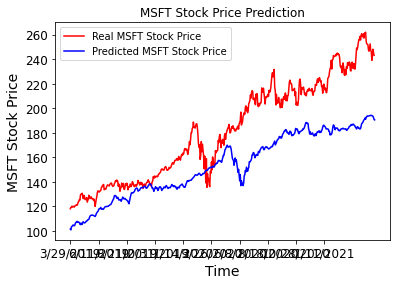

In [12]:
# Visualising the results
plt.plot(df.loc[600:1138, "Date"],dataset_test.values, color = "red", label = "Real MSFT Stock Price")
plt.plot(df.loc[600:1139, "Date"],predicted_stock_price, color = "blue", label = "Predicted MSFT Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()

In [13]:
# predict the next day close price
dataset_pre = df.iloc[1159:, 4:5]
inputs = dataset_pre.values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 60, 1)


In [14]:
predicted_stock_price = model.predict(X_test)

In [15]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [16]:
# the next day close price 
predicted_stock_price[-1]

array([268.61343], dtype=float32)

### In the next steps we will do the same 10 times to predict the next 10 days.

In [17]:
#find the next day close price 
dataset_train = df.iloc[:600, 4:5]
dataset_pre = pd.DataFrame (predicted_stock_price, columns = ['Close'])
dataset_total = pd.concat((dataset_train, dataset_pre), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_pre) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 60, 1)


In [18]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [19]:
#the next day close price 
predicted_stock_price[-1]

array([268.613], dtype=float32)

In [20]:
#find the next day close price 
dataset_train = df.iloc[:600, 4:5]
dataset_pre = pd.DataFrame (predicted_stock_price, columns = ['Close'])
dataset_total = pd.concat((dataset_train, dataset_pre), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_pre) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 60, 1)


In [21]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [22]:
#the next day close price 
predicted_stock_price[-1]

array([268.6129], dtype=float32)

In [23]:
#find the next day close price 
dataset_train = df.iloc[:600, 4:5]
dataset_pre = pd.DataFrame (predicted_stock_price, columns = ['Close'])
dataset_total = pd.concat((dataset_train, dataset_pre), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_pre) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 60, 1)


In [24]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [25]:
#find the next day close price 
dataset_train = df.iloc[:600, 4:5]
dataset_pre = pd.DataFrame (predicted_stock_price, columns = ['Close'])
dataset_total = pd.concat((dataset_train, dataset_pre), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_pre) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 60, 1)


In [26]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [27]:
#find the next day close price 
dataset_train = df.iloc[:600, 4:5]
dataset_pre = pd.DataFrame (predicted_stock_price, columns = ['Close'])
dataset_total = pd.concat((dataset_train, dataset_pre), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_pre) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 60, 1)


In [28]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [29]:
#find the next day close price 
dataset_train = df.iloc[:600, 4:5]
dataset_pre = pd.DataFrame (predicted_stock_price, columns = ['Close'])
dataset_total = pd.concat((dataset_train, dataset_pre), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_pre) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 60, 1)


In [30]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [31]:
#find the next day close price 
dataset_train = df.iloc[:600, 4:5]
dataset_pre = pd.DataFrame (predicted_stock_price, columns = ['Close'])
dataset_total = pd.concat((dataset_train, dataset_pre), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_pre) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 60, 1)


In [32]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [33]:
#find the next day close price 
dataset_train = df.iloc[:600, 4:5]
dataset_pre = pd.DataFrame (predicted_stock_price, columns = ['Close'])
dataset_total = pd.concat((dataset_train, dataset_pre), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_pre) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 60, 1)


In [34]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [35]:
#find the next day close price 
dataset_train = df.iloc[:600, 4:5]
dataset_pre = pd.DataFrame (predicted_stock_price, columns = ['Close'])
dataset_total = pd.concat((dataset_train, dataset_pre), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_pre) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 60, 1)


In [36]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [37]:
#find the next day close price 
dataset_train = df.iloc[:600, 4:5]
dataset_pre = pd.DataFrame (predicted_stock_price, columns = ['Close'])
dataset_total = pd.concat((dataset_train, dataset_pre), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_pre) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 60, 1)


In [38]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [39]:
# the two weeks close prices
new_df = pd.DataFrame (predicted_stock_price[-11:], columns = ['Close'])
new_df
# df = pd.DataFrame(predicted_stock_price, columns = ['Open', 'High','Low','Close','Volume'])

,Close
0,107.880081
1,108.282982
2,109.003876
3,268.611450
4,268.611664
5,268.612030
6,268.612335
7,268.612579
8,268.612762
9,268.612854


### 3) Build simple linear model for other columns depending on close price

In [40]:
#Sandrized the dataset

from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
df = df.drop(['Date'], axis=1)  
# transform data
df = scaler.fit_transform(df)

In [41]:
df = pd.DataFrame(df, columns = ['Open', 'High','Low','Close','Volume'])

In [42]:
X_train = df[['Close']]
y_train = df.drop(['Close'], axis=1)
X_test_new = new_df 

In [43]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test_new)

In [44]:
y_pred 

array([[107.83364071, 107.85410413, 107.85658497,   5.39127428],
       [108.23636797, 108.25690781, 108.25939791,   5.41140912],
       [108.95695149, 108.97762808, 108.98013476,   5.44743557],
       [268.49581772, 268.54676974, 268.5529468 ,  13.42377562],
       [268.49603125, 268.54698331, 268.55316038,  13.4237863 ],
       [268.49639731, 268.54734943, 268.55352651,  13.4238046 ],
       [268.49670235, 268.54765453, 268.55383162,  13.42381985],
       [268.49694639, 268.54789862, 268.55407571,  13.42383205],
       [268.49712941, 268.54808168, 268.55425877,  13.4238412 ],
       [268.49722093, 268.54817321, 268.55435031,  13.42384577],
       [268.49728193, 268.54823423, 268.55441133,  13.42384882]])

In [45]:
final_output= pd.DataFrame(y_pred, columns = ['Open', 'High','Low','Volume'])

In [46]:
# The predicted values for the other columns 
final_output

,Open,High,Low,Volume
0,107.833641,107.854104,107.856585,5.391274
1,108.236368,108.256908,108.259398,5.411409
2,108.956951,108.977628,108.980135,5.447436
3,268.495818,268.546770,268.552947,13.423776
4,268.496031,268.546983,268.553160,13.423786
5,268.496397,268.547349,268.553527,13.423805
6,268.496702,268.547655,268.553832,13.423820
7,268.496946,268.547899,268.554076,13.423832
8,268.497129,268.548082,268.554259,13.423841
9,268.497221,268.548173,268.554350,13.423846


### Summary 

This RNN model might not be the desirable one because it does not give us a perfect prediction of the close prices. However, we can still use it to predict the next day's close prices. 

The RNN model output correctly predicts the other attributes. 